In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mindspore import nn, Tensor, ops
import mindspore
from IPython.display import display, clear_output
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

Load data

In [38]:
# load data
train=pd.read_csv('car_price.csv')

Data preprocessing

In [39]:
# data preprocessing
# The classification of cars can be basically determined by the 'carbody' attribute, and there are roughly five categories. However, the last two categories are very few and can basically be counted 
# as "sports cars", so the current review of car classification is determined to be four categories.
train.loc[(train['carbody']=='hardtop'),'carbody']='sportcar'
train.loc[(train['carbody']=='convertible'),'carbody']='sportcar'
train['carbody'].value_counts()

sedan        96
hatchback    70
wagon        25
sportcar     14
Name: carbody, dtype: int64

In [40]:
train['brand']=train['CarName'].str.split(" ",expand=True)[0]
train['brand']=train['brand'].replace({'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche','maxda':'mazda','Nissan':'nissan'})
train['brand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64

In [41]:
car_base_info=train[['car_ID','CarName','carbody','brand']]
car_base_info

,car_ID,CarName,carbody,brand
0,1,alfa-romero giulia,sportcar,alfa-romero
1,2,alfa-romero stelvio,sportcar,alfa-romero
2,3,alfa-romero Quadrifoglio,hatchback,alfa-romero
3,4,audi 100 ls,sedan,audi
4,5,audi 100ls,sedan,audi
...,...,...,...,...
200,201,volvo 145e (sw),sedan,volvo
201,202,volvo 144ea,sedan,volvo
202,203,volvo 244dl,sedan,volvo
203,204,volvo 246,sedan,volvo


Feature transformation

E:\anaconda_applicaitons\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


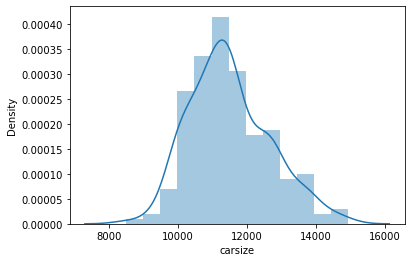

In [42]:
# cylindernumber
train['cylindernumber']=train['cylindernumber'].map({'two':'2','three':'3','four':'4','five':'5','six':'5','eight':'8','twelve':'12'})
train['cylindernumber']=pd.to_numeric(train['cylindernumber'],downcast='integer')

# car size: car height & car width
train['carsize']=train['carlength']*train['carwidth']
sns.distplot(train['carsize'])
train['carsize_band']=pd.cut(train['carsize'],4)
train.loc[(train['carsize']<=10111),'carsize']=0
train.loc[(train['carsize']>10111)&(train['carsize']<=11714),'carsize']=1
train.loc[(train['carsize']>11714)&(train['carsize']<=13317),'carsize']=2
train.loc[(train['carsize']>13317),'carsize']=3
train['carsize']=train['carsize'].astype(np.int64)
train.drop(['carsize_band','carlength','carwidth'],axis=1,inplace=True)

#car weight
train['carheight_band']=pd.cut(train['carheight'],5)
train.loc[(train['carheight']<=50.2),'carheight']=0
train.loc[(train['carheight']>50.2)&(train['carheight']<=52.6),'carheight']=1
train.loc[(train['carheight']>52.6)&(train['carheight']<=55),'carheight']=2
train.loc[(train['carheight']>55)&(train['carheight']<=57.4),'carheight']=3
train.loc[(train['carheight']>57.4),'carheight']=4
train['carheight']=train['carheight'].astype(np.int64)
train.drop(['carheight_band'],axis=1,inplace=True)

E:\anaconda_applicaitons\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


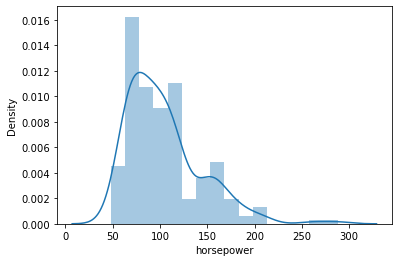

In [43]:
# horsepower
sns.distplot(train['horsepower'])
train['power_band']=pd.cut(train['horsepower'],4)
train['power_band'].value_counts()
train.loc[train['horsepower']<=108,'horsepower']=0
train.loc[(train['horsepower']>108)&(train['horsepower']<=168),'horsepower']=1
train.loc[(train['horsepower']>168),'horsepower']=2
train['horsepower']=train['horsepower'].astype(np.int64)
train.drop(['power_band'],axis=1,inplace=True)

E:\anaconda_applicaitons\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


         price_band      price
0    (8.539, 8.977]   8.815078
1    (8.977, 9.414]   9.165141
2     (9.414, 9.85]   9.655478
3    (9.85, 10.287]  10.038937
4  (10.287, 10.723]  10.475840


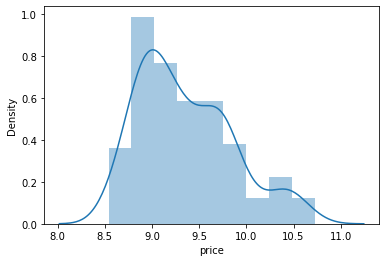

In [44]:
# price
train['price']=np.log1p(train['price'])
sns.distplot(train['price'])
train['price_band']=pd.cut(train['price'],5)
train['price_band'].value_counts()
print(train[['price_band','price']].groupby(['price_band'],as_index=False).mean().sort_values(by=['price'],ascending=True))

train.loc[train['price']<=8.997,'price']=0
train.loc[(train['price']>8.997)&(train['price']<=9.414),'price']=1
train.loc[(train['price']>9.414)&(train['price']<=9.85),'price']=2
train.loc[(train['price']>9.85)&(train['price']<=10.287),'price']=3
train.loc[(train['price']>10.287)&(train['price']<=10.723),'price']=4
train['price']=train['price'].astype(np.int64)
train=train.drop(['price_band'],axis=1)

E:\anaconda_applicaitons\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(93.46, 100.32]     125
(100.32, 107.18]     38
(107.18, 114.04]     18
(86.566, 93.46]      17
(114.04, 120.9]       7
Name: wheelbase_band, dtype: int64


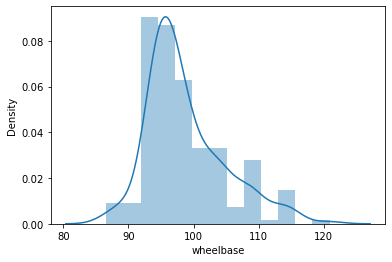

In [45]:
# wheelbase
sns.distplot(train['wheelbase'])
train['wheelbase_band']=pd.cut(train['wheelbase'],5)
print(train['wheelbase_band'].value_counts())
train.loc[(train['wheelbase']<=93.46),'wheelbase']=0
train.loc[(train['wheelbase']>93.46)&(train['wheelbase']<=100.32),'wheelbase']=1
train.loc[(train['wheelbase']>100.32)&(train['wheelbase']<=107.18),'wheelbase']=2
train.loc[(train['wheelbase']>107.18)&(train['wheelbase']<=114.04),'wheelbase']=3
train.loc[(train['wheelbase']>114.04)&(train['wheelbase']<=120.9),'wheelbase']=4

train['wheelbase']=train['wheelbase'].astype(np.int64)
train=train.drop(['wheelbase_band'],axis=1)

E:\anaconda_applicaitons\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


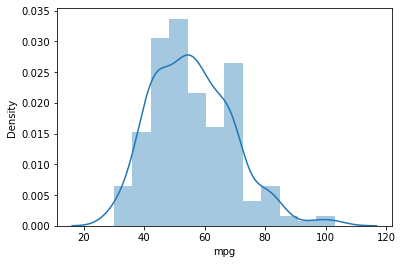

In [46]:
# citympg & highwaympg
train['mpg']=train['citympg']+train['highwaympg']
train=train.drop(['citympg','highwaympg'],axis=1)
train['mpg_band']=pd.cut(train['mpg'],5)
sns.distplot(train['mpg'])

train.loc[(train['mpg']<=44.6),'mpg']=0
train.loc[(train['mpg']>44.6)&(train['mpg']<=59.2),'mpg']=1
train.loc[(train['mpg']>59.2)&(train['mpg']<=73.8),'mpg']=2
train.loc[(train['mpg']>73.8),'mpg']=3

train['mpg']=train['mpg'].astype(np.int64)
train=train.drop(['mpg_band'],axis=1)

E:\anaconda_applicaitons\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


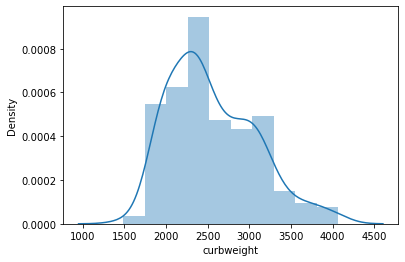

In [47]:
# curbweight
sns.distplot(train['curbweight'])
train['curb_band']=pd.cut(train['curbweight'],5)
train['curb_band'].value_counts()

train.loc[train['curbweight']<=2003.6,'curbweight']=0
train.loc[(train['curbweight']>2003.6)&(train['curbweight']<=2519.2),'curbweight']=1
train.loc[(train['curbweight']>2519.2)&(train['curbweight']<=3034.8),'curbweight']=2
train.loc[(train['curbweight']>3034.8)&(train['curbweight']<=3550.4),'curbweight']=3
train.loc[train['curbweight']>3550.4,'curbweight']=4

train['curbweight']=train['curbweight'].astype(np.int64)
train=train.drop(['curb_band'],axis=1)

In [48]:
# boreratio
train['boreratio_band']=pd.cut(train['boreratio'],5)
train['boreratio_band'].value_counts()

train.loc[train['boreratio']<=3.1,'boreratio']=0
train.loc[(train['boreratio']>3.1)&(train['boreratio']<=3.38),'boreratio']=1
train.loc[(train['boreratio']>3.38)&(train['boreratio']<=3.66),'boreratio']=2
train.loc[(train['boreratio']>3.66)&(train['boreratio']<=3.94),'boreratio']=3

train['boreratio']=train['boreratio'].astype(np.int64)
train=train.drop(['boreratio_band'],axis=1)

# stroke
train['stroke_band']=pd.cut(train['stroke'],5)
train['stroke_band'].value_counts()

train.loc[(train['stroke']<=2.91),'stroke']=0
train.loc[(train['stroke']>2.91)&(train['stroke']<=3.33),'stroke']=1
train.loc[(train['stroke']>3.33)&(train['stroke']<=3.75),'stroke']=2

train['stroke']=train['stroke'].astype(np.int64)
train=train.drop(['stroke_band'],axis=1)

# compressionratio
train['comp_brand']=pd.cut(train['compressionratio'],2)
train['comp_brand'].value_counts()

train.loc[train['compressionratio']<=15,'compressionratio']=0
train.loc[train['compressionratio']>15,'compressionratio']=1

train=train.drop(['comp_brand'],axis=1)
train['compressionratio']=train['compressionratio'].astype(np.int64)

# enginesize
train['engine_band']=pd.cut(train['enginesize'],5)
train['engine_band'].value_counts()

train.loc[(train['enginesize']<=114),'enginesize']=0
train.loc[(train['enginesize']>114)&(train['enginesize']<=167),'enginesize']=1
train.loc[(train['enginesize']>167)&(train['enginesize']<=220),'enginesize']=2
train.loc[(train['enginesize']>220),'enginesize']=3

train['enginesize'].astype(np.int64)
train.drop(['engine_band'],axis=1,inplace=True)

# peakrpm
train['rpm_band']=pd.cut(train['peakrpm'],5)
train['rpm_band'].value_counts()

train.loc[(train['peakrpm']<=4640),'peakrpm']=0
train.loc[(train['peakrpm']>4640)&(train['peakrpm']<=5130),'peakrpm']=1
train.loc[(train['peakrpm']>5130)&(train['peakrpm']<=5620),'peakrpm']=2
train.loc[(train['peakrpm']>5620)&(train['peakrpm']<=6110),'peakrpm']=3
train.loc[(train['peakrpm']>6110),'peakrpm']=4

train['peakrpm'].astype(np.int64)
train.drop(['rpm_band'],axis=1,inplace=True)

In [49]:
train.to_csv('data_preprocess.csv',index=False)